Chapter 6: Scientific Computing and Big Data Analysis with Python and Hadoop
===

## Jupyter Notebooks in VS Code
#### 1. Installing python environment
        https://www.python.org
#### 2. Installing Jupyter Notebooks
        pip install jupyter
#### 3. Setting up your environment
        use the Python: Select Interpreter command from the Command Palette
#### 4. Installing pakages to access HDFS
        pip install hdfs
        pip install pyarrow
#### 5. Other important packages
        pip install numpy
        pip install pandas
        pip install scikit-learn
        pip install matplotlib
        pip install seaborn

In [ ]:
pip install -r requirements.txt

In [ ]:
from hdfs import InsecureClient
import pandas as pd

# Create a connection to HDFS (Insecure mode)
client = InsecureClient('http://127.0.0.1:9870', user='root')

with client.read('/input/OnlineRetail.csv', encoding = 'utf-8') as reader:
    #df = pd.read_csv(reader,index_col=0)
    df = pd.read_csv(reader,on_bad_lines='skip')

### Reading data from OnlineRetail.csv file

In [18]:
import pandas as pd
path='OnlineRetail.csv'
df = pd.read_csv(path,on_bad_lines='skip')
#Displays the top three entries in the DataFrame
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


Length, or size, of the DataFrame

In [19]:
len(df)

64723

We defined a new DataFrame called df2, and we set it as all the entries in the original
DataFrame with unit prices greater than three.

In [21]:
df2 = df.loc[df.UnitPrice > 3.0]
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Data that has a unit price above 3.0 => set their description to Miscellaneous

In [22]:
df.loc[df.UnitPrice > 3.0, ['Description']] = 'Miscellaneous'
df.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,Miscellaneous,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


The line of code outputs the data with index 2

In [23]:
df.loc[2]

InvoiceNo                              536365
StockCode                              84406B
Description    CREAM CUPID HEARTS COAT HANGER
Quantity                                    8
InvoiceDate                    12/1/2010 8:26
UnitPrice                                2.75
CustomerID                            17850.0
Country                        United Kingdom
Name: 2, dtype: object

We can create a plot of the Quantity from index 0 to 1500

<Axes: >

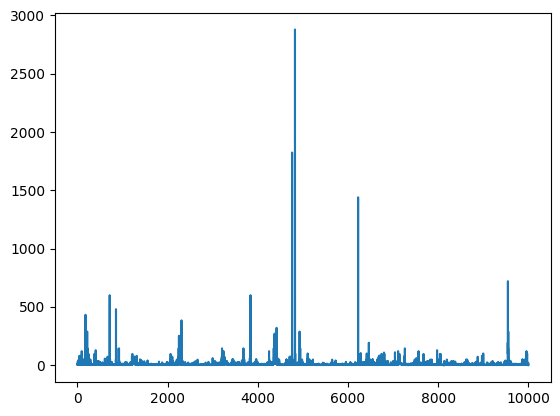

In [24]:
df['Quantity'][0:10000].astype(float).plot()

<Axes: >

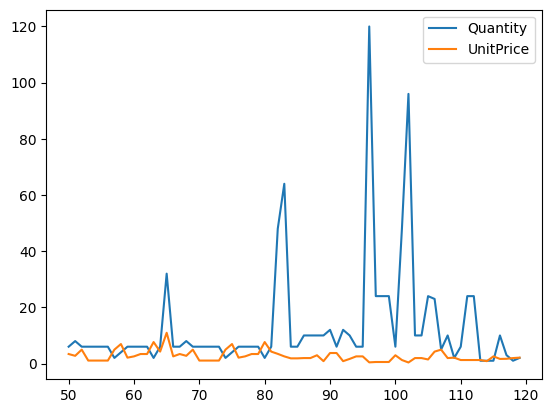

In [25]:
d8 = pd.DataFrame(df, columns=['Quantity', 'UnitPrice'])[50:120].astype(float)
d8.plot()

We append rows 200–209 to rows 0–9 of df:

In [117]:
df3 = df[0:10]._append(df[200:210])
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,Miscellaneous,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,Miscellaneous,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,Miscellaneous,6,12/1/10 8:26,3.39,17850,United Kingdom
5,536365,22752,Miscellaneous,2,12/1/10 8:26,7.65,17850,United Kingdom
6,536365,21730,Miscellaneous,6,12/1/10 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047,United Kingdom


We can define a new DataFrame object to contain only "StockCode, Quantity, InvoiceDate, and UnitPrice"

In [120]:
df4 = pd.DataFrame(df, columns=['StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice'])
df4.head(3)

,StockCode,Quantity,InvoiceDate,UnitPrice
0,85123A,6,12/1/10 8:26,2.55
1,71053,6,12/1/10 8:26,3.39
2,84406B,8,12/1/10 8:26,2.75


We set d3 to be the concatenation of d1 and d2. This is the result once they are concatenated.
We can specify keys that will make it easier to distinguish between d1 and d2

In [125]:
d1 = df[0:10]
d2 = df[10:20]
d3 = pd.concat([d1, d2],keys=['d1', 'd2']) #keys is optional
d3

InvoiceNo StockCode                         Description Quantity  \
d1 0     536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER        6   
   1     536365     71053                       Miscellaneous        6   
   2     536365    84406B      CREAM CUPID HEARTS COAT HANGER        8   
   3     536365    84029G                       Miscellaneous        6   
   4     536365    84029E                       Miscellaneous        6   
   5     536365     22752                       Miscellaneous        2   
   6     536365     21730                       Miscellaneous        6   
   7     536366     22633              HAND WARMER UNION JACK        6   
   8     536366     22632           HAND WARMER RED POLKA DOT        6   
   9     536367     84879       ASSORTED COLOUR BIRD ORNAMENT       32   
d2 10    536367     22745          POPPY'S PLAYHOUSE BEDROOM         6   
   11    536367     22748           POPPY'S PLAYHOUSE KITCHEN        6   
   12    536367     22749                       Miscellaneous        8   
   13    536367     22310             IVORY KNITTED MUG COSY         6   
   14    536367     84969                       Miscellaneous        6   
   15    536367     22623                       Miscellaneous        3   
   16    536367     22622                       Miscellaneous        2   
   17    536367     21754                       Miscellaneous        3   
   18    536367     21755                       Miscellaneous        3   
   19    536367     21777                       Miscellaneous        4   

        InvoiceDate  UnitPrice CustomerID         Country  
d1 0   12/1/10 8:26       2.55      17850  United Kingdom  
   1   12/1/10 8:26       3.39      17850  United Kingdom  
   2   12/1/10 8:26       2.75      17850  United Kingdom  
   3   12/1/10 8:26       3.39      17850  United Kingdom  
   4   12/1/10 8:26       3.39      17850  United Kingdom  
   5   12/1/10 8:26       7.65      17850  United Kingdom  
   6   12/1/10 8:26       4.25      17850  United Kingdom  
   7   12/1/10 8:28       1.85      17850  United Kingdom  
   8   12/1/10 8:28       1.85      17850  United Kingdom  
   9   12/1/10 8:34       1.69      13047  United Kingdom  
d2 10  12/1/10 8:34       2.10      13047  United Kingdom  
   11  12/1/10 8:34       2.10      13047  United Kingdom  
   12  12/1/10 8:34       3.75      13047  United Kingdom  
   13  12/1/10 8:34       1.65      13047  United Kingdom  
   14  12/1/10 8:34       4.25      13047  United Kingdom  
   15  12/1/10 8:34       4.95      13047  United Kingdom  
   16  12/1/10 8:34       9.95      13047  United Kingdom  
   17  12/1/10 8:34       5.95      13047  United Kingdom  
   18  12/1/10 8:34       5.95      13047  United Kingdom  
   19  12/1/10 8:34       7.95      13047  United Kingdom